<div align="center">

### **PARCIAL #1 SEÑALES Y SISTEMAS - 2025 2S**
#### **Estudiante:** Martín Ramírez Espinosa
##### Departamento de Ingeniería Eléctrica, Electrónica y Computación
##### Universidad Nacional de Colombia - Sede Manizales

</div>

---

In [62]:
import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

matplotlib.rcParams['animation.embed_limit'] = 60  # MB

---

**1.** La distancia media entre dos señales periódicas $x_1(t) \in \mathbb{R}, \mathbb{C}$ y $x_2(t) \in \mathbb{R}, \mathbb{C}$; se puede expresar a partir de la potencia media de la diferencia entre ellas:

<div align="center">

$d^2(x_1, x_2) = \overline{P}_{(x_1 - x_2)} = \lim_{T\to\infty} \frac{1}{T} \int_{T} \left| x_{1}(t) - x_{2}(t) \right|^{2} \, dt$

</div>

Sean $x_1(t)$ y $x_2(t)$ definidas como:

<div align="center">

$
\begin{aligned}
x_{1}(t) &= A e^{-\mathrm{j} n \omega_{0} t} &\qquad& \omega_{0}=\frac{2\pi}{\Tau},\ \ \Tau,A,B\in\mathbb{R}^{+},\ \ n,m\in\mathbb{Z} \\
x_{2}(t) &= B e^{\mathrm{j} m \omega_{0} t} &&
\end{aligned}
$

</div>

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

In [63]:
''' Definición simbólica '''
# Variable independiente
t = sp.symbols('t', real=True) # Tiempo [s]

# Parámetros de las señales
A, B = sp.symbols('A B', real=True, positive=True)  # Amplitudes
T = sp.symbols('T', real=True, positive=True)       # Periodo [s]
w_0 = 2 * sp.pi / T                                 # Frecuencia angular fundamental [rad/s]
n, m = sp.symbols('n m', integer=True)              # Múltiplos enteros de la frecuencia fundamental

# Señales periódicas
x_1 = A * sp.exp( -sp.I * n * w_0 * t )  # x_1(t)
x_2 = B * sp.exp( sp.I * m * w_0 * t )   # x_2(t)

''' Cálculo de la distancia media '''
# Evaluar la distancia media
d = sp.sqrt(sp.limit( (1 / T) * sp.integrate( sp.Abs(x_1 - x_2)**2, (t, 0, T) ), T, sp.oo ))
# Imprimir el resultado
d

sqrt(A**2 - 2*A*B + B**2)

---

**2.** Encuentre la señal en tiempo discreto al utilizar un conversor análogo a digital con frecuencia de muestreo de $5 kHz$ y $4 bits$ de capacidad de representación aplicado a la señal continua:

<div align="center">

$x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)$

</div>

Realizar la simulación del proceso de discretización de al menos tres periodos de $x(t)$. En caso de que la discretización no sea apropiada, diseñe e implemete un conversor adecuado para la señal estudiada.

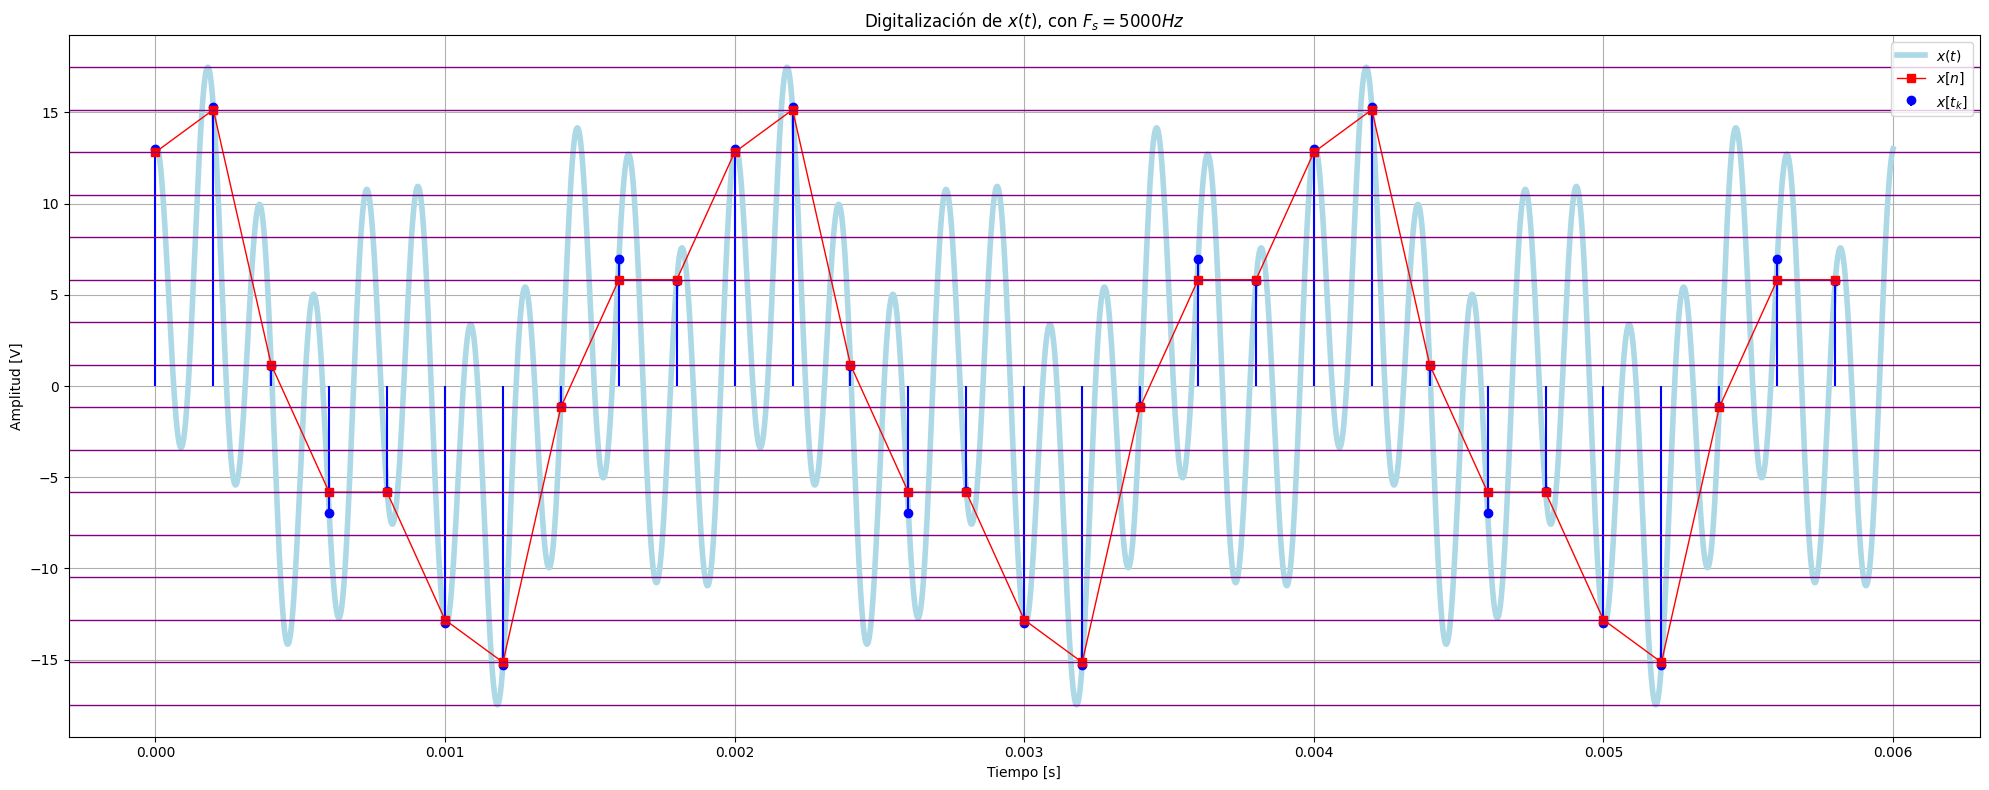

In [64]:
''' Parámetros del conversor A/D '''
# Muestreo
F_s = 5000    # Frecuencia de muestreo [Hz]
T_s = 1 / F_s  # Periodo de muestreo [s]

# Capacidad de representación
n_bits = 4              # Número de bits
num_levels = 2**n_bits  # Número de niveles de cuantización

''' Tiempos '''
T_0 = 1 / 500                        # Periodo de la señal x(t) [s]
sim_time = 3 * T_0                   # Tiempo de simulación [s]
t = np.linspace(0, sim_time, 20000)  # Vector de tiempo 'continuo' [s]
t_k = np.arange(0, sim_time, T_s)    # Vector de tiempo discreto [s]

''' Señal x(t) '''
x_t = 3 * np.cos(1000*np.pi*t) + 5 * np.sin(3000*np.pi*t) + 10 * np.cos(11000*np.pi*t)  # x(t) [V]

''' Digitalización '''
# Discretización
x_tk = 3 * np.cos(1000*np.pi*t_k) + 5 * np.sin(3000*np.pi*t_k) + 10 * np.cos(11000*np.pi*t_k)  # x[t_k] [V]

# Cuantización
levels = np.linspace(min(x_t), max(x_t), num_levels)  # Vector de niveles de cuantización
distances = np.abs(x_tk[:, None] - levels[None, :])   # Matriz de distancias entre muestras y niveles
indices = np.argmin(distances, axis=1)                # Índices de los niveles más cercanos

# Señal digitalizada
x_n = levels[indices]  # x[n] [V]

''' Visualización '''
# Gráfica 1: Digitalización de x(t) con Fs = 5000 Hz (incumple Nyquist)
plt.figure(figsize=(20, 8))
plt.plot(t, x_t, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='blue', markerfmt='blue', basefmt=" ")
plt.plot(t_k, x_n, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)

plt.title('Digitalización de $x(t)$, con $F_s = {} Hz$'.format(F_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Digitalización adecuada de $x(t)$:**

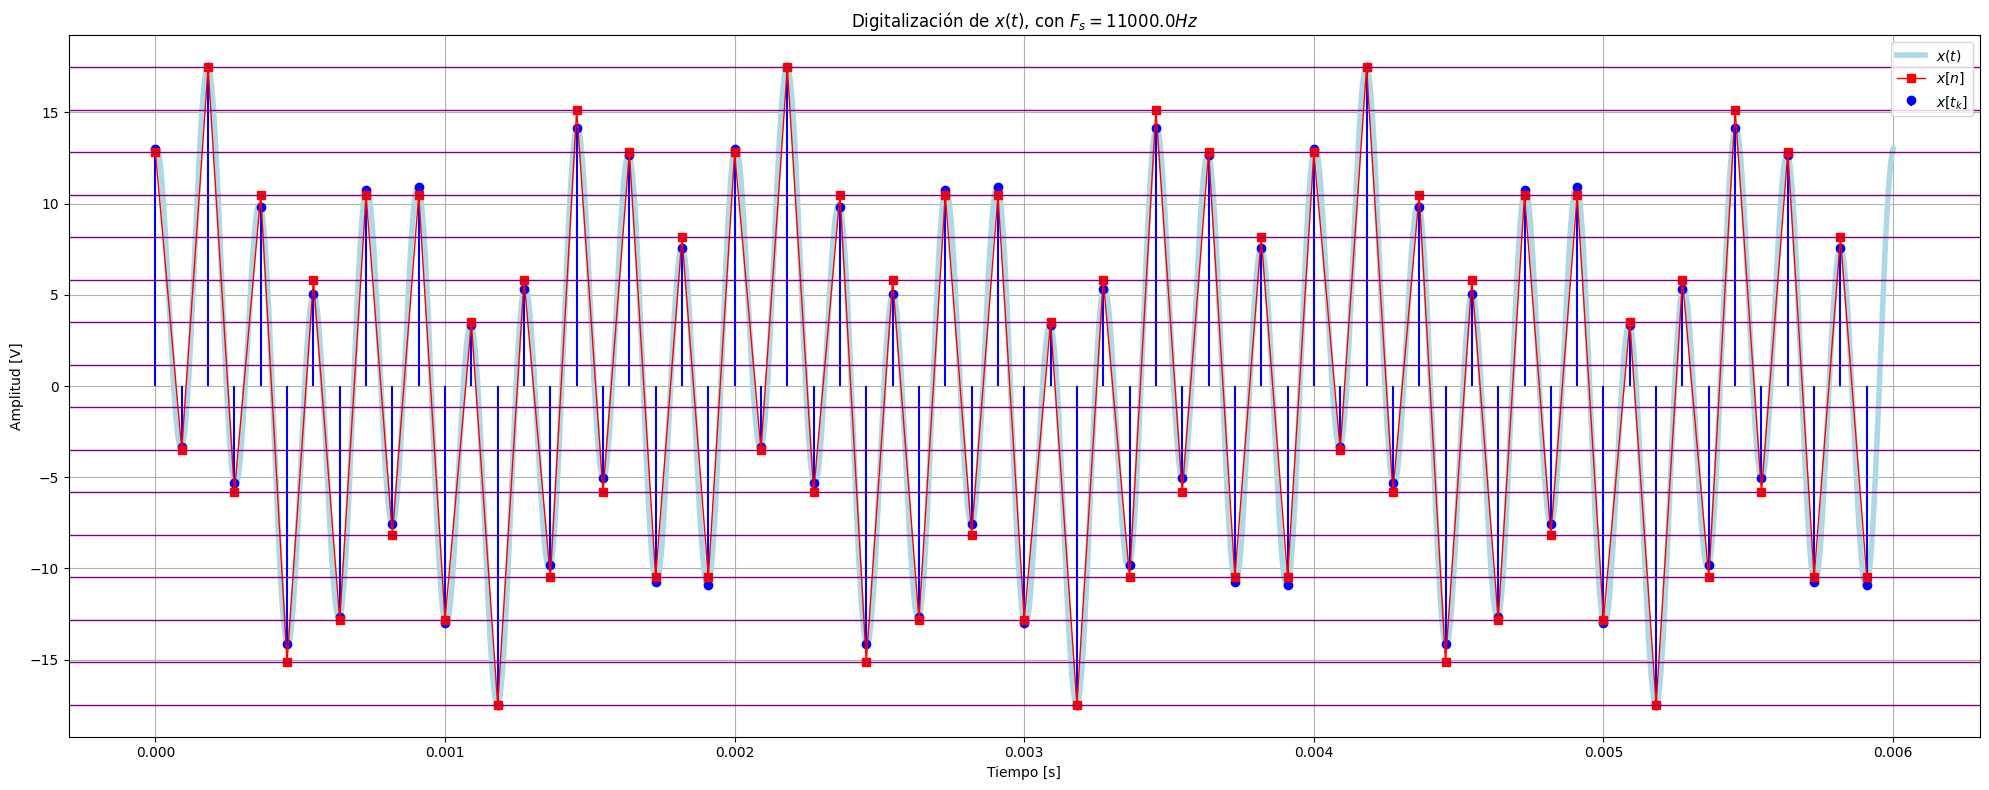

In [65]:
''' Parámetros del conversor A/D '''
# Muestreo
F_s = 2 * (11000 / 2)   # Frecuencia de muestreo [Hz] (Fs >= 2*f_max)
T_s = 1 / F_s           # Periodo de muestreo [s]

# Capacidad de representación
n_bits = 4              # Número de bits
num_levels = 2**n_bits  # Número de niveles de cuantización

''' Tiempos '''
T_0 = 1 / 500                        # Periodo de la señal x(t) [s]
sim_time = 3 * T_0                   # Tiempo de simulación [s]
t = np.linspace(0, sim_time, 20000)  # Vector de tiempo 'continuo' [s]
t_k = np.arange(0, sim_time, T_s)    # Vector de tiempo discreto [s]

''' Señal x(t) '''
x_t = 3 * np.cos(1000*np.pi*t) + 5 * np.sin(3000*np.pi*t) + 10 * np.cos(11000*np.pi*t)  # x(t) [V]

''' Digitalización '''
# Discretización
x_tk = 3 * np.cos(1000*np.pi*t_k) + 5 * np.sin(3000*np.pi*t_k) + 10 * np.cos(11000*np.pi*t_k)  # x[t_k] [V]

# Cuantización
levels = np.linspace(min(x_t), max(x_t), num_levels)  # Vector de niveles de cuantización
distances = np.abs(x_tk[:, None] - levels[None, :])   # Matriz de distancias entre muestras y niveles
indices = np.argmin(distances, axis=1)                # Índices de los niveles más cercanos

# Señal digitalizada
x_n = levels[indices]  # x[n] [V]

''' Visualización '''
# Gráfica 2: Digitalización de x(t) cumpliendo Nyquist
plt.figure(figsize=(20, 8))
plt.plot(t, x_t, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='blue', markerfmt='blue', basefmt=" ")
plt.plot(t_k, x_n, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)

plt.title('Digitalización de $x(t)$, con $F_s = {} Hz$'.format(F_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

---

**3.** Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \in [t_i, t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

<div align="center">

$c_n = \frac{1}{(t_{i}-t_{f})n^2\omega_0^2} \int_{t_i}^{t_f} x''(t)\, e^{-j n \omega_0 t}\, dt, \qquad n \in \mathbb{Z}$

</div>

¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?

---

**4.** Encuentre el espectro de Fourier, su parte real e imaginaria, magnitud, fase y el error relativo de la estimación para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$ a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente la simulaciones de Python respectivas.

<div align="center">
  <img src="Signal.png" alt="Signal" width="500">
  <br><strong>Figura 1. Señal x(t)</strong><br>
</div>

In [66]:
''' Definición simbólica '''
# Variable independiente
t = sp.symbols('t', real=True)  # Tiempo [s]

# Parámetros de la señal
T, d_1, d_2, A = sp.symbols('T d_1 d_2 A', real=True, positive=True)  # Periodo [s], duraciones [s] y valor pico [V]
w_0 = 2 * sp.pi / T                     # Frecuencia angular fundamental [rad/s]
m_1 = A / (d_2 - d_1); b_1 = m_1 * d_2  # Pendiente y corte en y de la primera rampa ascendente [V/s], [V]
m_2 = A / d_1;         b_2 = 0          # Pendiente y corte en y de la segunda rampa descendente [V/s], [V]

# x(t) [V]
x_t = sp.Piecewise(
    (0,            sp.And(t >= -T/2, t < -d_2)),  # 0 si t ∈ [-T/2, -d_2)
    (m_1*t + b_1,  sp.And(t >= -d_2, t < -d_1)),  # m_1*t + b_1 si t ∈ [-d_2, -d_1)
    (-m_2*t + b_2, sp.And(t >= -d_1, t < 0)),     # -m_2*t + b_2 si t ∈ [-d_1, 0)
    (m_2*t + b_2,  sp.And(t >= 0,    t < d_1)),   # m_2*t + b_2 si t ∈ [0, d_1)
    (-m_1*t + b_1, sp.And(t >= d_1,  t < d_2)),   # -m_1*t + b_1 si t ∈ [d_1, d_2)
    (0,            sp.And(t >= d_2,  t <= T/2))   # 0 si t ∈ [d_2, T/2]
)

# x'(t) [V/s]
x_p = sp.Piecewise(
    (0,     sp.And(t >= -T/2, t < -d_2)),  # 0 si t ∈ [-T/2, -d_2)
    (m_1,   sp.And(t >= -d_2, t < -d_1)),  # m_1 si t ∈ [-d_2, -d_1)
    (-m_2,  sp.And(t >= -d_1, t < 0)),     # -m_2 si t ∈ [-d_1, 0)
    (m_2,   sp.And(t >= 0,    t < d_1)),   # m_2 si t ∈ [0, d_1)
    (-m_1,  sp.And(t >= d_1,  t < d_2)),   # -m_1 si t ∈ [d_1, d_2)
    (0,     sp.And(t >= d_2,  t <= T/2))   # 0 si t ∈ [d_2, T/2]
)

# x''(t) [V/s^2]
x_pp = m_1*(sp.DiracDelta(t+d_2)+sp.DiracDelta(t-d_2)) - (m_1+m_2)*(sp.DiracDelta(t+d_1)+sp.DiracDelta(t-d_1)) + 2*m_2*sp.DiracDelta(t)

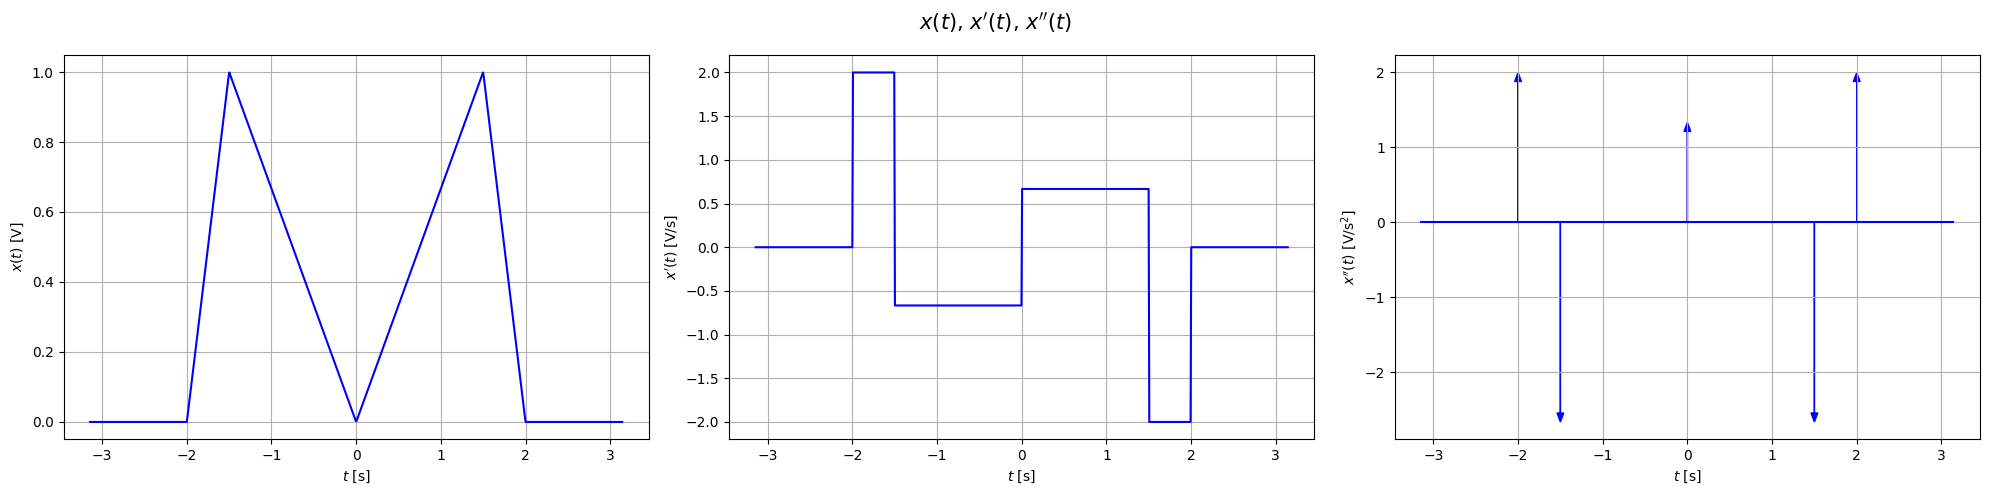

In [ ]:
''' Evaluación numérica y visualización '''
# Parámetros de la señal
PARAMS = {A: 1, T: 2*sp.pi, d_1: 1.5, d_2: 2.0}

# x(t) y x'(t) como funciones numéricas
X_t = sp.lambdify(t, x_t.subs(PARAMS), modules=['numpy'])
X_p = sp.lambdify(t, x_p.subs(PARAMS), modules=['numpy'])

# Parámetros numéricos
Tau = float(sp.N(T.subs(PARAMS)))              # Periodo [s]
D_1 = float(sp.N(d_1.subs(PARAMS)))            # Duraciones [s]
D_2 = float(sp.N(d_2.subs(PARAMS)))
M_1 = float(sp.N((A/(D_2-D_1)).subs(PARAMS)))  # Pendientes [V/s]
M_2 = float(sp.N((A/D_1).subs(PARAMS)))

# Vector de tiempo para graficar
t_vals = np.linspace(-Tau/2, Tau/2, 800)  # [s]

# Figura con las tres gráficas
fig1, axs1 = plt.subplots(1, 3, figsize=(20, 5), sharex=True)  # Comparten eje x
fig1.suptitle("$x(t)$, $x'(t)$, $x''(t)$", fontsize=15)

# x(t)
axs1[0].plot(t_vals, X_t(t_vals), color='blue')
axs1[0].set_xlabel("$t$ [s]")
axs1[0].set_ylabel("$x(t)$ [V]")
axs1[0].grid(True)

# x'(t)
axs1[1].plot(t_vals, X_p(t_vals), color='blue')
axs1[1].set_xlabel("$t$ [s]")
axs1[1].set_ylabel("$x'(t)$ [V/s]")
axs1[1].grid(True)

# x''(t)
X_pp = np.zeros(len(t_vals))  # Segunda derivada es cero en todas partes excepto en las deltas de Dirac
dirac_on = np.array([-D_2, -D_1, 0.0, D_1, D_2])                      # Encendimientos de las deltas de Dirac [s]
dirac_weights  = np.array([M_1, -(M_1+M_2), 2*M_2, -(M_1+M_2), M_1])  # 'Magnitudes' de las deltas de Dirac [V/s^2]
# Representar deltas de Dirac como flechas (vector-like)
for x, y in zip(dirac_on, dirac_weights):
    axs1[2].arrow(x, 0, 0, y, head_width=0.08, head_length=0.12, length_includes_head=True, color='blue')
axs1[2].plot(t_vals, X_pp, color='blue')
axs1[2].set_ylabel(r"$x''(t)$ [V/s$^2$]")
axs1[2].set_xlabel("$t$ [s]")
axs1[2].grid(True)

plt.tight_layout()
display(fig1)
plt.close(fig1)

In [68]:
''' Análisis de Fourier '''
# Armónico n-ésimo
n = sp.symbols('n', integer=True)

# Coeficiente 0: media de x(t)
c_0 = (A * d_2) / T

# Coeficiente n-ésimo de la serie
c_n = (-1 / (T * n**2 * w_0**2)) * ((2*m_1*sp.cos(d_2*n*w_0) - 2*(m_1 + m_2)*sp.cos(d_1*n*w_0) + 2*m_2))  # n != 0

''' Estimación de la señal '''
# Número de armónicos para la estimación
N = 5

# x_hat(t)
x_hat = c_0 + sum(c_n.subs(n, k) * sp.exp(sp.I * k * w_0 * t) for k in range(-N, N+1) if k != 0)

''' Error relativo '''
# Potencia de x(t)
P_x = (2 * A**2 * d_2) / (3 * T) # [V^2]

# Potencia de x_hat(t)
P_xhat = c_0**2 + sum(sp.Abs(c_n.subs(n, k))**2 for k in range(-N, N+1) if k != 0) # [V^2]

# Error relativo
e_r = (1 - (P_xhat / P_x)) * 100 # [%]

In [69]:
# Rebuild only the ANIMATED figure with a taller bottom row using GridSpec height ratios.
# Bottom row now gets ~2.2x the height of a single row.

import numpy as np
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

matplotlib.rcParams['animation.embed_limit'] = 40  # MB

# --- Minimal signal + coefficients (same trapezoid and Cn as before) ---
t = sp.symbols('t', real=True)
T, d_1, d_2, A = sp.symbols('T d_1 d_2 A', real=True, positive=True)
w_0 = 2 * sp.pi / T

m_1 = A / (d_2 - d_1); b_1 = m_1 * d_2
m_2 = A / d_1;         b_2 = 0
x_t = sp.Piecewise(
    (0,            sp.And(t >= -T/2, t < -d_2)),
    (m_1*t + b_1,  sp.And(t >= -d_2, t < -d_1)),
    (-m_2*t + b_2, sp.And(t >= -d_1, t < 0)),
    (m_2*t + b_2,  sp.And(t >= 0,    t < d_1)),
    (-m_1*t + b_1, sp.And(t >= d_1,  t < d_2)),
    (0,            sp.And(t >= d_2,  t <= T/2))
)
n = sp.symbols('n', integer=True)
c_0 = (A * d_2) / T
c_n = (-1 / (T * n**2 * w_0**2)) * ( 2*m_1*sp.cos(d_2*n*w_0) - 2*(m_1 + m_2)*sp.cos(d_1*n*w_0) + 2*m_2 )

# Numeric params
PARAMS = {A: 3.3, T: 2*sp.pi, d_1: 1.0, d_2: 2.0}
w0_val  = float(sp.N(w_0.subs(PARAMS)))
T_val   = float(sp.N(T.subs(PARAMS)))
x_func  = sp.lambdify(t, sp.simplify(x_t.subs(PARAMS)), modules=['numpy'])

def Cn_eval(k: int) -> complex:
    if k == 0:
        return complex(float(sp.N(c_0.subs(PARAMS))))
    expr = c_n.subs(PARAMS).subs(n, int(k))
    return complex(sp.N(expr))

# Power + relative error
P_x = float(sp.N(((2 * A**2 * d_2) / (3 * T)).subs(PARAMS)))
def P_xhat_N(N: int) -> float:
    return float(sum(abs(Cn_eval(k))**2 for k in range(-N, N+1)))
def rel_error_percent(N: int) -> float:
    return float( (1.0 - P_xhat_N(N)/P_x) * 100.0 )

# Animation controls
N_MAX       = 14
NUM_T_ANIM  = 500
INTERVAL_MS = 160
t_anim = np.linspace(-T_val/2, T_val/2, NUM_T_ANIM)
x_true_vals = x_func(t_anim)

# Precompute arrays
n_show = list(range(-N_MAX, N_MAX+1))
C_arr  = np.array([Cn_eval(k) for k in n_show])
abs_C  = np.abs(C_arr)
arg_C  = np.angle(C_arr)
real_C = np.real(C_arr)

# --- Figure with taller bottom row ---
fig2 = plt.figure(figsize=(13, 10), constrained_layout=True)
gs = fig2.add_gridspec(nrows=3, ncols=3, height_ratios=[1, 1, 2.2])

ax_re   = fig2.add_subplot(gs[0, 0])
ax_im   = fig2.add_subplot(gs[0, 1])
ax_Cn   = fig2.add_subplot(gs[0, 2])
ax_mag  = fig2.add_subplot(gs[1, 0:2])
ax_arg  = fig2.add_subplot(gs[1, 2])
ax_time = fig2.add_subplot(gs[2, :])

fig2.suptitle("Trapezoidal Waveform — Complex Fourier Series (Taller Bottom Row)", fontsize=13)

# Top row init
re_lines = [ax_re.plot(t_anim, np.nan*np.zeros_like(t_anim), lw=1)[0] for _ in range(N_MAX)]
ax_re.set_title(r"Overlaid $\Re\{C_k e^{j k \omega_0 t}\}$")
ax_re.set_xlabel("$t$ [s]"); ax_re.set_ylabel("Amplitude"); ax_re.grid(True); ax_re.set_xlim(t_anim[0], t_anim[-1])

im_lines = [ax_im.plot(t_anim, np.nan*np.zeros_like(t_anim), lw=1)[0] for _ in range(N_MAX)]
ax_im.set_title(r"Overlaid $\Im\{C_k e^{j k \omega_0 t}\}$")
ax_im.set_xlabel("$t$ [s]"); ax_im.set_ylabel("Amplitude"); ax_im.grid(True); ax_im.set_xlim(t_anim[0], t_anim[-1])

ax_Cn.stem(n_show, real_C, basefmt=" ")
ax_Cn.set_title(r"$C_n$ vs $n$ (signed)")
ax_Cn.set_xlabel("$n$"); ax_Cn.set_ylabel(r"$C_n$"); ax_Cn.grid(True)
hi_Cn_pos, = ax_Cn.plot([], [], marker="o", linestyle="")
hi_Cn_neg, = ax_Cn.plot([], [], marker="o", linestyle="")

# Middle row init
ax_mag.stem(n_show, abs_C, basefmt=" ")
ax_mag.set_title(r"$|C_n|$ vs $n$"); ax_mag.set_xlabel("$n$"); ax_mag.set_ylabel(r"$|C_n|$"); ax_mag.grid(True)
hi_mag_pos, = ax_mag.plot([], [], marker="o", linestyle="")
hi_mag_neg, = ax_mag.plot([], [], marker="o", linestyle="")

ax_arg.stem(n_show, arg_C, basefmt=" ")
ax_arg.set_title(r"$\arg(C_n)$ vs $n$"); ax_arg.set_xlabel("$n$"); ax_arg.set_ylabel("angle [rad]"); ax_arg.grid(True)
hi_arg_pos, = ax_arg.plot([], [], marker="o", linestyle="")
hi_arg_neg, = ax_arg.plot([], [], marker="o", linestyle="")

# Bottom row (taller) init
x_line,    = ax_time.plot(t_anim, x_true_vals, linestyle="--", label=r"$x(t)$")
xhat_line, = ax_time.plot(t_anim, np.zeros_like(t_anim), label=r"$\hat{x}_N(t)$")
err_line,  = ax_time.plot(t_anim, np.zeros_like(t_anim), label="error(t)")
ax_time.set_title(r"$x(t)$,\; $\hat{x}_N(t)$,\; error(t)\; +\; e_r(N)$")
ax_time.set_xlabel("$t$ [s]"); ax_time.set_ylabel("Amplitude"); ax_time.grid(True); ax_time.legend(loc="best")
err_text = ax_time.text(0.02, 0.95, "", transform=ax_time.transAxes, va="top")

def update(frame_idx):
    N = frame_idx + 1
    # Overlay Re/Im up to N
    for k in range(1, N_MAX+1):
        idx = k-1
        if k <= N:
            Ck = Cn_eval(k)
            ejkwt = np.exp(1j * k * w0_val * t_anim)
            re_lines[idx].set_ydata(np.real(Ck * ejkwt))
            im_lines[idx].set_ydata(np.imag(Ck * ejkwt))
        else:
            re_lines[idx].set_ydata(np.nan*np.zeros_like(t_anim))
            im_lines[idx].set_ydata(np.nan*np.zeros_like(t_anim))

    # Highlights for ±N
    Cpos, Cneg = Cn_eval(N), Cn_eval(-N)
    hi_Cn_pos.set_data([ N], [ np.real(Cpos)]); hi_Cn_neg.set_data([-N], [ np.real(Cneg)])
    hi_mag_pos.set_data([ N], [ np.abs(Cpos)]); hi_mag_neg.set_data([-N], [ np.abs(Cneg)])
    hi_arg_pos.set_data([ N], [ np.angle(Cpos)]); hi_arg_neg.set_data([-N], [ np.angle(Cneg)])

    # Partial sum + error
    xhat = np.zeros_like(t_anim, dtype=np.complex128)
    for k in range(-N, N+1):
        xhat += Cn_eval(k) * np.exp(1j * k * w0_val * t_anim)
    xr = np.real(xhat)
    xhat_line.set_ydata(xr)
    err_line.set_ydata(x_true_vals - xr)
    erN = float((1.0 - sum(abs(Cn_eval(k))**2 for k in range(-N, N+1))/P_x) * 100.0)
    err_text.set_text(fr"$e_r(N) \approx {erN:.3f}\,\%$")

    # Autoscale dynamic panels
    for ax in [ax_re, ax_im, ax_time]:
        ax.relim(); ax.autoscale_view()

    return []

anim = FuncAnimation(fig2, update, frames=N_MAX, interval=INTERVAL_MS, blit=False, repeat=True)

plt.close(fig2)
display(HTML(anim.to_jshtml()))
